In [1]:
!pip install findspark

In [2]:
import findspark

findspark.init('C:\spark')

## Configuration and Spark Connection

In [3]:
from pyspark import SparkContext
sc = SparkContext(master="local")
sc

<SparkContext master=local appName=pyspark-shell>

In [4]:
sc.version

'3.5.5'

In [5]:
sc.sparkUser()

'Alperen Arda'

In [6]:
sc.appName

'pyspark-shell'

In [7]:
sc.stop()

In [8]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

spark = SparkSession.builder \
    .master("local") \
    .appName("pysparkperen") \
    .getOrCreate()

sc = spark.sparkContext
sc

<SparkContext master=local appName=pysparkperen>

In [9]:
sc.stop()

* SparkSession → Spark uygulamasının ana kapısıdır; veri okumak, yazmak, işlemek için kullanılır. 
* SparkContext → Spark'ın motoru gibidir; işin arka planında küme yönetimi ve dağıtık işlem yapar.

Özet:
* SparkSession = Kullanıcı arayüzü,
* SparkContext = Motor (altyapı).

## Buradaki temel amacımız, PySpark ortamını oluşturup (SparkSession + SparkContext oluşturup) RDD veya DataFrame işlemleri yapmak

# Temel DataFrame İşlemleri

Python'da ve Pandas'ta alışık olduğumuz fonksiyonları Spark işlemlerinde kullanamayabiliyoruz. Spark'a uyumlu olan fonksiyonları kullanmalıyız.

In [10]:
spark = SparkSession.builder \
    .master('local') \
    .appName('dataframe_operations') \
    .getOrCreate()

sc = spark.sparkContext
sc

<SparkContext master=local appName=dataframe_operations>

In [11]:
spark_df = spark.read.csv("diabetes.csv", header=True, inferSchema=True)

In [12]:
spark_df.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [13]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [14]:
spark_df.cache() # Burada amaç, Veriyi belleğe (RAM'e) almak ve ileriye dönük işlemlerde aynı veriyi tekrar tekrar diskten okumayı önlemek.

DataFrame[Pregnancies: int, Glucose: int, BloodPressure: int, SkinThickness: int, Insulin: int, BMI: double, DiabetesPedigreeFunction: double, Age: int, Outcome: int]

Burada amaç, Veriyi belleğe (RAM'e) almak ve ileriye dönük işlemlerde aynı veriyi tekrar tekrar diskten okumayı önlemek.

In [15]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [16]:
import seaborn as sns 
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include=["float64", "int64"])

In [17]:
type(df)

pandas.core.frame.DataFrame

In [18]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75


In [19]:
spark_df.head()

Row(Pregnancies=6, Glucose=148, BloodPressure=72, SkinThickness=35, Insulin=0, BMI=33.6, DiabetesPedigreeFunction=0.627, Age=50, Outcome=1)

In [20]:
df.dtypes

carat    float64
depth    float64
table    float64
price    float64
x        float64
y        float64
z        float64
dtype: object

In [21]:
spark_df.dtypes

[('Pregnancies', 'int'),
 ('Glucose', 'int'),
 ('BloodPressure', 'int'),
 ('SkinThickness', 'int'),
 ('Insulin', 'int'),
 ('BMI', 'double'),
 ('DiabetesPedigreeFunction', 'double'),
 ('Age', 'int'),
 ('Outcome', 'int')]

1) **Pandas DataFrame**, veriyi işlerken **tek çekirdek** kullanır; **paralel çalışmaz**.  
   **Spark DataFrame** ise veriyi **birden çok makine ve çekirdeğe dağıtarak paralel işler.**

2) **Spark DataFrame** işlemleri **lazy (tembel)** çalışır, yani işlemler hemen yapılmaz, **hesaplamalar en son ihtiyaç duyulduğunda topluca yapılır**.  
   **Pandas DataFrame** işlemleri ise **anında (eager)** çalışır, her adımda hemen hesaplanır.

3) **Spark DataFrame immutable'dır** → bir kere oluşturulduktan sonra **değiştirilemez**, her değişiklik yeni bir DataFrame üretir.  
   **Pandas DataFrame mutable'dır** → doğrudan değiştirilebilir.

In [22]:
spark_df.show(7)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


In [23]:
spark_df.count()

768

In [24]:
spark_df.columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [25]:
spark_df.describe().show()

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|               768|                     768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.992578124999977|      0.4718763020833327|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|15.95

### Değişken Seçimi

In [26]:
spark_df.describe("Glucose").show()

+-------+-----------------+
|summary|          Glucose|
+-------+-----------------+
|  count|              768|
|   mean|     120.89453125|
| stddev|31.97261819513622|
|    min|                0|
|    max|              199|
+-------+-----------------+



In [27]:
spark_df.select("Glucose", "Pregnancies", "Outcome").show(10)

+-------+-----------+-------+
|Glucose|Pregnancies|Outcome|
+-------+-----------+-------+
|    148|          6|      1|
|     85|          1|      0|
|    183|          8|      1|
|     89|          1|      0|
|    137|          0|      1|
|    116|          5|      0|
|     78|          3|      1|
|    115|         10|      0|
|    197|          2|      1|
|    125|          8|      1|
+-------+-----------+-------+
only showing top 10 rows



In [28]:
spark_df.select('Glucose').distinct().count()

136

In [29]:
spark_df.select("Glucose").drop_duplicates().show() # distinct ile drop_duplicate aynı

+-------+
|Glucose|
+-------+
|    148|
|     85|
|    137|
|     65|
|    133|
|     78|
|    155|
|    108|
|    193|
|    115|
|    126|
|    101|
|     81|
|    183|
|     76|
|    159|
|     44|
|    103|
|     91|
|    128|
+-------+
only showing top 20 rows



In [30]:
spark_df.crosstab("Outcome", "Pregnancies").show() # lazy olmasinin ornegi cunku her seye show yaziyoz kendisi gostermiyor.

+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|Outcome_Pregnancies|  0|  1| 10| 11| 12| 13| 14| 15| 17|  2|  3|  4|  5|  6|  7|  8|  9|
+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|                  0| 73|106| 14|  4|  5|  5|  0|  0|  0| 84| 48| 45| 36| 34| 20| 16| 10|
|                  1| 38| 29| 10|  7|  4|  5|  2|  1|  1| 19| 27| 23| 21| 16| 25| 22| 18|
+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+



In [31]:
spark_df.dropna().show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


## Gözlem Seçme

In [32]:
spark_df.filter(spark_df.Age > 40).count()

194

In [33]:
spark_df.groupby('Outcome').count().show()

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



In [34]:
spark_df.groupby('Outcome').agg({'BMI': 'mean'}).show()

+-------+-----------------+
|Outcome|         avg(BMI)|
+-------+-----------------+
|      1|35.14253731343278|
|      0|30.30419999999996|
+-------+-----------------+



In [35]:
new_df = spark_df.withColumn('new_feature', spark_df.BMI / 2) # yeni degisken ekleme
# spark_df immutable'dir ve yeni bir tablo olusturmus olduk.

In [36]:
new_df.select('BMI', 'new_feature').show()

+----+-----------+
| BMI|new_feature|
+----+-----------+
|33.6|       16.8|
|26.6|       13.3|
|23.3|      11.65|
|28.1|      14.05|
|43.1|      21.55|
|25.6|       12.8|
|31.0|       15.5|
|35.3|      17.65|
|30.5|      15.25|
| 0.0|        0.0|
|37.6|       18.8|
|38.0|       19.0|
|27.1|      13.55|
|30.1|      15.05|
|25.8|       12.9|
|30.0|       15.0|
|45.8|       22.9|
|29.6|       14.8|
|43.3|      21.65|
|34.6|       17.3|
+----+-----------+
only showing top 20 rows



In [37]:
spark_df.withColumnRenamed('Outcome', 'bagimli_degisken').columns # degisken ismi degistirme

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'bagimli_degisken']

In [38]:
spark_df.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



In [39]:
spark_df.drop('Insulin').columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

Şayet, tıpkı pandas'taki gibi bir elemana erişmek istesek nasıl yaparız?

In [40]:
a = spark_df.groupby('Outcome').count()

In [41]:
a = a.toPandas()
a

,Outcome,count
0,1,268
1,0,500


In [42]:
a.iloc[0, 1]

np.int64(268)

a[0, 1]
Pandas DataFrame bu şekilde çoklu indekslemeyi doğrudan desteklemez.  
a[0, 1] 'NumPy' tarzı yazımdır ama Pandas'ta çalışmaz 

Spark DataFrame'leri, altta yatan RDD (Resilient Distributed Dataset) yapıları üzerinde çalışır ve işlemler dağıtık bellekte (RAM) yürütülür. Bu veriler doğrudan yerel belleğe aktarılmaz. Eğer veriyi yerel makinede Pandas DataFrame olarak kullanmak istiyorsak, toPandas() metodu ile veri driver node üzerine çekilir ve Pandas formatına dönüştürülür.

## SQL İşlemleri

In [43]:
sc

<SparkContext master=local appName=dataframe_operations>

In [44]:
spark_df.registerTempTable("table_df")

C:\spark\python\pyspark\sql\dataframe.py:329: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


In [47]:
spark.sql('show databases').show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [48]:
spark.sql('show tables').show()

+---------+---------+-----------+
|namespace|tableName|isTemporary|
+---------+---------+-----------+
|         | table_df|       true|
+---------+---------+-----------+



In [50]:
spark.sql('SELECT mean(Glucose) FROM table_df WHERE Age > 40').show()

+------------------+
|     mean(Glucose)|
+------------------+
|131.06185567010309|
+------------------+



In [51]:
spark.sql('select Outcome, mean(Glucose) from table_df group by Outcome').show()

+-------+------------------+
|Outcome|     mean(Glucose)|
+-------+------------------+
|      1|141.25746268656715|
|      0|            109.98|
+-------+------------------+



## Büyük Veri Görselleştirme

In [52]:
import matplotlib.pyplot as plt 
import seaborn as sns

Spark'ta seaborn gibi görselleştirme kütüphaneleri kullanamıyoruz. Adımları sıralayacak olursak:  
1) Spark işlemleri ile veriyi toparlamak ve görselleştirmeyi istediğimiz veriyi çıkarmak.
2) Oluşan veriyi .toPandas() metodu ile lokale çekmek.
3) Pandas üzerinden görselleştirmek.

In [55]:
sdf = spark_df.toPandas()
sdf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='Outcome', ylabel='None'>

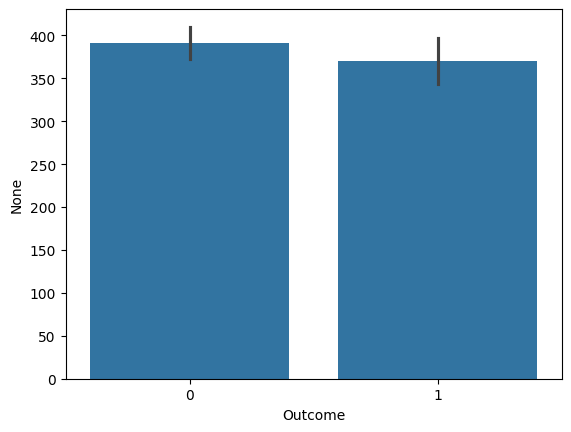

In [56]:
sns.barplot(x='Outcome', y=sdf.Outcome.index, data=sdf)